In [1]:
import os
import sys
import random
import json
import collections
import itertools

import pandas as pd
import numpy as np
import scipy        
import statsmodels


from tqdm import trange, tqdm_notebook as tqdm
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_columns = 999

sns.set()

plt.rcParams["figure.figsize"] = (10,7)

In [2]:
os.getcwd()

'/home/boris/study/UT study/ACM Sigmod/sigmod/notebooks'

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from sigmod_src.utils import read_json, pprint_json, path_from_spec_id, get_vector_for_spec_id
from sigmod_src.data.embedding import Embedder

# Load data

In [5]:
LABELS_PATH = '../data/raw/sigmod_medium_labelled_dataset.csv'

In [6]:
labels_df = pd.read_csv(LABELS_PATH)
labels_df.shape

(46665, 3)

In [7]:
labels_df.head()

,left_spec_id,right_spec_id,label
0,www.garricks.com.au//31,www.ebay.com//53278,1
1,www.ebay.com//58782,www.ebay.com//24817,0
2,www.ebay.com//58782,www.ebay.com//43019,0
3,www.ebay.com//42055,www.ebay.com//54403,0
4,www.ebay.com//44280,buy.net//6145,0


# Load specs df

In [8]:
specs_df = pd.read_csv('../data/processed/specs_preprocessed.csv')
specs_df.index=  specs_df.spec_id
specs_df.shape

(29771, 7)

In [9]:
specs_df[specs_df.page_title.isnull()]

,spec_id,page_title,all_text,page_title_stem,all_text_stem,brand,site
spec_id,,,,,,,


In [10]:
specs_df.head()

,spec_id,page_title,all_text,page_title_stem,all_text_stem,brand,site
spec_id,,,,,,,
www.ebay.com//57656,www.ebay.com//57656,canon powershot elph 110 hs 16 1 mp,canon elph 110 hs 16 1 mp canon manufacturer r...,canon powershot elph 110 hs 16 1 mp,canon elph 110 hs 16 1 mp canon manufactur ref...,canon,www.ebay.com
www.ebay.com//60583,www.ebay.com//60583,canon rebel 2000 35 mm great case instruction ...,canon rebel 2000 35 mm great case instruction ...,canon rebel 2000 35 mm great case instruct boo...,canon rebel 2000 35 mm great case instruct boo...,canon,www.ebay.com
www.ebay.com//60440,www.ebay.com//60440,canon eos rebel t3i 18 55mm 75 300mm iii lens ...,canon eos rebel 18 55mm 75 300mm iii lens kit ...,canon eo rebel t3i 18 55mm 75 300mm iii len ki...,canon eo rebel 18 55mm 75 300mm iii len kit us...,canon,www.ebay.com
www.ebay.com//24139,www.ebay.com//24139,ge c1033 10 1 mp 3x zoom 2 4 lcd,ge c1033 10 1 mp 3x zoom 2 4 ge unused undamag...,ge c1033 10 1 mp 3x zoom 2 4 lcd,ge c1033 10 1 mp 3x zoom 2 4 ge unus undamag o...,NaN,www.ebay.com
www.ebay.com//54903,www.ebay.com//54903,vivitar clip shot 1 1 mp,vivitar clip shot 1 1 mp vivitar unused undama...,vivitar clip shot 1 1 mp,vivitar clip shot 1 1 mp vivitar unus undamag ...,vivitar,www.ebay.com


In [11]:
specs_df.page_title.sample(5).values[0]

'olympus 460 1 3 mp'

In [12]:
specs_df.page_title_stem.sample(5).values[0]

'ab case water well inspect drill sewer system drill sewer system pipe inspect plumb inspect'

# Make embedder and index

In [13]:
emb = Embedder.load('../models/embedder')

In [14]:
# emb = Embedder(vector_size=200,
#                train_epochs=100,
#                index_trees=1000)

In [15]:
# emb.fit(specs_df.page_title_stem, specs_df.spec_id)

# Visual evaluation

In [16]:
random_spec = specs_df.sample(1).iloc[0]
spec_id = random_spec.spec_id
text = random_spec.page_title_stem

nn_ids = emb.lookup_ids(text, n=100)
nn_texts =  emb.lookup_texts(text, n=100)

print(f'Query:\n\t{text}')
newline_ = '\n\t'
print(f'3 Closest:\n\t{newline_.join(nn_texts[:3])}')

print(f'Most distant:\n\t{nn_texts[-1]}')

Query:
	fujifilm finepix z3 5 1 mp pink
3 Closest:
	finepix z3 5 1 mp pink lock af lock audio record auto power save bright control dpof support imag rotat nois reduct direct print pictbridg support resiz imag usb compat ttl contrast detect manufactur specif point shoot may sign cosmet wear fulli oper function intend may floor model store return seller full detail descript imperfect open window tab read moreabout 1 x dc power input 1 x usb 1 x composit output 1 x dock station frame per second frame per second avi 6x 3 1 x card 2 ev rang ev step automat program auto mode mode mode reduct slow synchro flash none 36 108mm automat 10 iso 100 iso 1600 iso 200 iso 400 iso 64 iso 800 iso auto 1600 40 c sec mp microphon 0 c 4 sec z3 z3 appl mac os x later ms window 2000 ms window 98 ms window 98 se ms window ms window xp 3x real photo technolog captur treasur moment eye see combin rpii processor 5th generat super sensor fujinon len optic z3 deliv sensit low nois faster oper speed reduc power c

# Obtian labelled dataset recall

In [17]:
def get_candidate_specs(query_text, emb, n):
    nn_spec_ids = emb.lookup_ids(query_text, n=n)
    return nn_spec_ids

dups_df = labels_df[labels_df.label==1]
results = []
print(int(0.5*len(dups_df)))
for row in tqdm(dups_df.sample(int(0.5*len(dups_df))).itertuples()):
    left_spec = specs_df.loc[row.left_spec_id]
    candidates = emb.lookup_ids(left_spec.page_title_stem, n=500, search_k=1500)
    target_index = None
    if row.right_spec_id in candidates:
        target_index = list(candidates).index(row.right_spec_id)
    
    
    results.append((row.left_spec_id, row.right_spec_id, target_index))

1791


HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

In [18]:
results_df = pd.DataFrame(results)
results_df.columns = ['left_spec_id', 'right_spec_id', 'right_spec_rank']
results_df.head()

,left_spec_id,right_spec_id,right_spec_rank
0,www.ebay.com//42569,www.ebay.com//48111,NaN
1,www.ilgs.net//86,www.ebay.com//55107,NaN
2,www.ebay.com//54560,www.ebay.com//41940,130.0
3,www.priceme.co.nz//2382,www.camerafarm.com.au//777,20.0
4,www.ebay.com//48111,www.ebay.com//54255,NaN


In [19]:
def compute_recall_k(ranks, k):
    total_number = len(ranks)
    matched_number = ranks[(~ranks.isnull()) & (ranks <= k)]
    return len(matched_number)/total_number

In [20]:
ks = [1, 10, 50, 100, 500, 1000]
for k in ks:
    print(f'Recall-{k}: ', round(compute_recall_k(results_df.right_spec_rank, k), 4))

Recall-1:  0.0089
Recall-10:  0.0508
Recall-50:  0.1267
Recall-100:  0.1843
Recall-500:  0.3892
Recall-1000:  0.3892


# Visualize embedding

## Obtain classes from labels

Each class - camera model. All specs that are duplicates of eachother consitute the same class. In a graph one class = one connected component.

In [21]:
dup_df = labels_df[labels_df.label==1][['left_spec_id', 'right_spec_id', 'label']].sort_values(by=['left_spec_id', 'right_spec_id'])

In [22]:
dup_df.shape

(3582, 3)

In [23]:
dup_df.head()

,left_spec_id,right_spec_id,label
27484,buy.net//5641,www.ebay.com//58588,1
24490,buy.net//5641,www.gosale.com//849,1
12459,buy.net//5641,www.price-hunt.com//9794,1
5120,buy.net//5698,cammarkt.com//501,1
31627,buy.net//5698,www.ebay.com//41940,1


In [24]:
len(set(dup_df.left_spec_id).union(dup_df.right_spec_id))

306

In [25]:
class_mapping = {
    
}

def replace_class_mapping(prev_class, new_class):
    for k in class_mapping:
        if k == prev_class:
            class_mapping[k] = new_class

cur_class = 0
for row in dup_df.itertuples():
    if row.left_spec_id in class_mapping or row.right_spec_id in class_mapping:
        if row.left_spec_id in class_mapping and row.right_spec_id in class_mapping and class_mapping[row.left_spec_id] != class_mapping[row.right_spec_id]:
            raise Exception('wtf')
        
        existing_class = class_mapping.get(row.left_spec_id, class_mapping.get(row.right_spec_id))
        class_mapping[row.left_spec_id] = existing_class
        class_mapping[row.right_spec_id] = existing_class
    else:
        class_mapping[row.left_spec_id] = cur_class
        class_mapping[row.right_spec_id] = cur_class
        cur_class += 1


In [26]:
classes_df = pd.DataFrame({'spec_id': list(class_mapping.keys()), 'class_': list(class_mapping.values())})
classes_df.shape

(306, 2)

In [27]:
classes_df.head()

,spec_id,class_
0,buy.net//5641,0
1,www.ebay.com//58588,0
2,www.gosale.com//849,0
3,www.price-hunt.com//9794,0
4,buy.net//5698,1


In [28]:
classes_df.tail()

,spec_id,class_
301,www.gosale.com//462,25
302,www.shopbot.com.au//271,21
303,www.shopmania.in//1458,26
304,www.mypriceindia.com//52,26
305,www.wexphotographic.com//601,13


In [29]:
classes_df.index = classes_df.spec_id

In [30]:
classes_df.to_csv('../data/interim/classes.csv', index=None)

In [31]:
len(set(labels_df.left_spec_id).union(labels_df.right_spec_id))

306

## Get spec vectors

In [32]:
dir(emb.indexer)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'add_item',
 'build',
 'f',
 'get_distance',
 'get_item_vector',
 'get_n_items',
 'get_n_trees',
 'get_nns_by_item',
 'get_nns_by_vector',
 'load',
 'on_disk_build',
 'save',
 'set_seed',
 'unbuild',
 'unload',
 'verbose']

In [33]:
vecs = []
for i in tqdm(range(len(specs_df))):
    vecs.append(emb.indexer.get_item_vector(i))

HBox(children=(IntProgress(value=0, max=29771), HTML(value='')))

In [34]:
vecs = np.array(vecs)

In [35]:
vecs.shape

(29771, 200)

In [36]:
vecs = pd.DataFrame(vecs, index=specs_df.spec_id)
vecs.shape

(29771, 200)

## Pairwise distances distirubtion

In [37]:
from scipy.spatial.distance import pdist, cdist

In [38]:
sample_features = vecs.sample(5000)

In [39]:
pairwise_distances = pdist(sample_features)

/home/boris/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


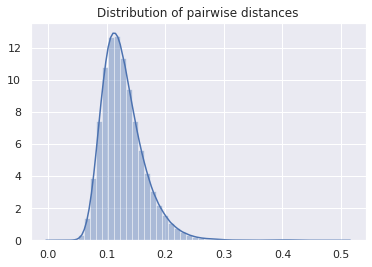

In [40]:
plt.figure()
plt.title('Distribution of pairwise distances')
sns.distplot(pairwise_distances)
plt.show()

In [41]:
# Vector for spec
vecs.loc['www.ebay.com//42835'].head()

0    0.000000
1    0.115768
2    0.000000
3    0.000000
4    0.000000
Name: www.ebay.com//42835, dtype: float64

In [42]:
duplicate_pairs = dup_df.sample(1000)[['left_spec_id', 'right_spec_id']].values

duplicate_vector_pairs = []
for s1, s2 in duplicate_pairs:
    duplicate_vector_pairs.append([
        vecs.loc[s1],
        vecs.loc[s2]
    ])
    
duplicate_vector_pairs = np.array(duplicate_vector_pairs)

#duplicate_vector_pairs[:3]

In [43]:
non_duplicate_pairs = labels_df[labels_df.label==0].sample(10000)[['left_spec_id', 'right_spec_id']].values

non_duplicate_vector_pairs = []
for s1, s2 in non_duplicate_pairs:
    non_duplicate_vector_pairs.append([
        vecs.loc[s1],
        vecs.loc[s2]
    ])

        
non_duplicate_vector_pairs = np.array(non_duplicate_vector_pairs)
# non_duplicate_vector_pairs[:3]

In [44]:
duplicate_vector_pairs.shape

(1000, 2, 200)

In [45]:
def compute_pairwise_distances(pairs_arr):
    dists = []
    for i in range(len(pairs_arr)):
        dists.append(pdist(pairs_arr[i])[0])
    return dists

In [46]:
duplicate_vector_pairs.shape

(1000, 2, 200)

In [47]:
duplicate_distances = compute_pairwise_distances(duplicate_vector_pairs)
non_duplicate_distances = compute_pairwise_distances(non_duplicate_vector_pairs)

In [48]:
len(duplicate_distances), len(non_duplicate_distances)

(1000, 10000)

/home/boris/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


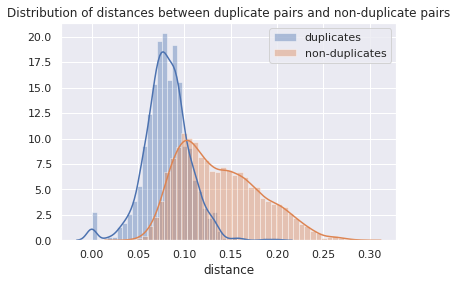

In [49]:
plt.figure()
plt.title('Distribution of distances between duplicate pairs and non-duplicate pairs')
sns.distplot(duplicate_distances, label='duplicates')
sns.distplot(non_duplicate_distances, label='non-duplicates')
plt.legend()
plt.xlabel('distance')
plt.show()

### Duplicates are more likely to have a small distance, but currenlty the embedding is crap

# TSNE visualization

In [50]:
from MulticoreTSNE import MulticoreTSNE as TSNE

In [51]:
tsne = TSNE(
    n_components=2,
    metric='cosine',
    n_jobs=3,
    verbose=True,
)

In [52]:
spec_features_ld = tsne.fit_transform(vecs)

In [53]:
spec_features_ld.shape

(29771, 2)

In [54]:
spec_features_ld = pd.DataFrame(spec_features_ld, index=specs_df.spec_id)
spec_features_ld['class_'] = classes_df.class_
spec_features_ld.shape

(29771, 3)

In [55]:
specs_df.iloc[46]

spec_id                                          www.ebay.com//41954
page_title                                 canon eos 20d 8 2 mp body
all_text           canon eos 20d 8 2 mp body canon extra battery ...
page_title_stem                             canon eo 20d 8 2 mp bodi
all_text_stem      canon eo 20d 8 2 mp bodi canon extra batteri m...
brand                                                          canon
site                                                    www.ebay.com
Name: www.ebay.com//41954, dtype: object

In [56]:
spec_features_ld.iloc[46]

0         -4.810111
1         31.783835
class_     6.000000
Name: www.ebay.com//41954, dtype: float64

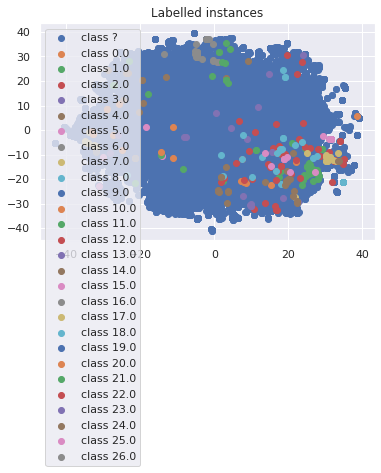

In [57]:
plt.figure()
plt.title('Labelled instances')
class_ld_df = spec_features_ld[pd.isnull(spec_features_ld.class_)]
plt.scatter(class_ld_df.iloc[:, 0], class_ld_df.iloc[:, 1], label=f'class ?')

for class_ in spec_features_ld['class_'].sort_values().unique():
    if pd.isnull(class_):
        continue
    class_ld_df = spec_features_ld[spec_features_ld.class_==class_]
    plt.scatter(class_ld_df.iloc[:, 0], class_ld_df.iloc[:, 1], label=f'class {class_}')

plt.legend()
plt.show()